In [13]:
import numpy as np
from load_dataset import load_data
from utils import *

In [2]:
# dev_x_orig, dev_y, classes = load_data('dev_set')
train_x_orig, train_y, classes = load_data('training_set')
test_x_orig, test_y, classes = load_data('test_set')

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 608.95it/s]


In [3]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print ("Number of dev examples: " + str(m_train))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))

Number of dev examples: 6000
Each image is of size: (100, 100, 3)
train_x_orig shape: (6000, 100, 100, 3)
train_y shape: (1, 6000)


In [4]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (30000, 6000)
test_x's shape: (30000, 2000)


$30,000$ equals $100 \times 100 \times 3$ which is the size of one reshaped image vector.

## 3 - Architecture of your model (L-layer Neural Network)

In [5]:
### CONSTANTS ###
layers_dims = [train_x.shape[0], 20, 7, 5, 1] #  4-layer model

In [6]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693759
Cost after iteration 100: 0.686096
Cost after iteration 200: 0.679834
Cost after iteration 300: 0.672412
Cost after iteration 400: 0.663740
Cost after iteration 500: 0.655413
Cost after iteration 600: 0.647496
Cost after iteration 700: 0.641965
Cost after iteration 800: 0.639917
Cost after iteration 900: 0.638216
Cost after iteration 1000: 0.635486
Cost after iteration 1100: 0.632204
Cost after iteration 1200: 0.628613
Cost after iteration 1300: 0.624848
Cost after iteration 1400: 0.622235
Cost after iteration 1500: 0.617865
Cost after iteration 1600: 0.615516
Cost after iteration 1700: 0.609869
Cost after iteration 1800: 0.608232
Cost after iteration 1900: 0.603189
Cost after iteration 2000: 0.601557
Cost after iteration 2100: 0.597420
Cost after iteration 2200: 0.592872
Cost after iteration 2300: 0.588795
Cost after iteration 2400: 0.587274


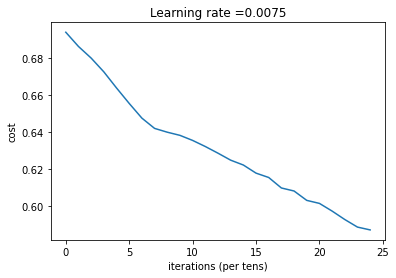

In [7]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [8]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.6803333333333335


In [9]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.6140000000000001


ValueError: cannot reshape array of size 30000 into shape (64,64,3)

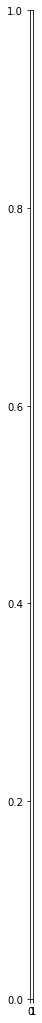

In [14]:
print_mislabeled_images(classes, test_x, test_y, pred_test)